Загрузка датасета

In [ ]:
!wget http://www.soshnikov.com/permanent/data/petfaces.tar.gz
!tar xfz petfaces.tar.gz
!rm petfaces.tar.gz

--2024-04-11 12:47:46--  http://www.soshnikov.com/permanent/data/petfaces.tar.gz
Resolving www.soshnikov.com (www.soshnikov.com)... 79.137.227.122
Connecting to www.soshnikov.com (www.soshnikov.com)|79.137.227.122|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24483412 (23M) [application/x-tar]
Saving to: ‘petfaces.tar.gz’

petfaces.tar.gz     100%[===================>]  23.35M   212KB/s    in 1m 50s  

2024-04-11 12:49:37 (218 KB/s) - ‘petfaces.tar.gz’ saved [24483412/24483412]



Импорт библиотек

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import random
import pandas as pd

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, top_k_accuracy_score

# Предобработка данных

In [ ]:
folder_path = '/content/petfaces'

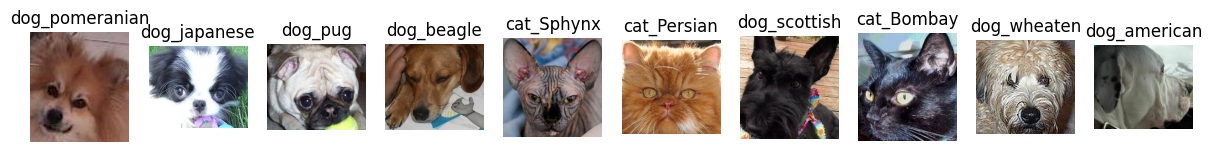

In [ ]:
def visualize_random_pet_images(folder_path, num_images=5):
    pet_breeds = os.listdir(folder_path)

    plt.figure(figsize=(15, 8))

    selected_breeds = random.sample(pet_breeds, num_images)

    for i, breed in enumerate(selected_breeds, start=1):
        breed_path = os.path.join(folder_path, breed)
        pet_images = os.listdir(breed_path)

        random_image = random.choice(pet_images)
        image_path = os.path.join(breed_path, random_image)

        img = mpimg.imread(image_path)
        plt.subplot(1, num_images, i)
        plt.imshow(img)
        plt.title(breed)
        plt.axis('off')

    plt.show()

visualize_random_pet_images(folder_path, num_images=10)

In [ ]:
def count_images(folder_path):
    total_count = 0
    cat_count = 0
    dog_count = 0
    breed_counts = {}

    pet_breeds = os.listdir(folder_path)

    for breed in pet_breeds:
        breed_path = os.path.join(folder_path, breed)
        if os.path.isdir(breed_path):
            images = os.listdir(breed_path)
            count = len(images)
            breed_counts[breed] = count
            total_count += count
            if "cat" in breed.lower():
                cat_count += count
            elif "dog" in breed.lower():
                dog_count += count

    return total_count, cat_count, dog_count, breed_counts

total_count, cat_count, dog_count, breed_counts = count_images(folder_path)

In [ ]:
print("Общее количество фотографий:", total_count)
print("Количество фотографий кошек:", cat_count)
print("Количество фотографий собак:", dog_count)
print("Количество фотографий для каждой породы:")
for breed, count in breed_counts.items():
    print(f"{breed}: {count}")

Общее количество фотографий: 3211
Количество фотографий кошек: 1106
Количество фотографий собак: 2105
Количество фотографий для каждой породы:
dog_pug: 89
cat_Siamese: 100
cat_Bombay: 87
dog_wheaten: 91
cat_Ragdoll: 96
dog_newfoundland: 98
dog_yorkshire: 81
dog_chihuahua: 83
cat_Russian: 97
dog_staffordshire: 87
dog_havanese: 93
dog_samoyed: 68
cat_Persian: 94
dog_miniature: 75
cat_Egyptian: 73
cat_Sphynx: 100
dog_boxer: 85
dog_japanese: 74
dog_leonberger: 95
dog_basset: 88
cat_British: 100
cat_Birman: 98
cat_Abyssinian: 92
dog_scottish: 59
dog_saint: 90
cat_Bengal: 74
dog_german: 69
dog_shiba: 82
dog_american: 174
dog_keeshond: 83
dog_pomeranian: 90
dog_great: 91
cat_Maine: 95
dog_english: 182
dog_beagle: 78


In [ ]:
def create_dataframe(folder_path, animal_class=None):
    image_paths = []
    labels = []

    pet_breeds = os.listdir(folder_path)

    for breed in pet_breeds:
        breed_path = os.path.join(folder_path, breed)
        if os.path.isdir(breed_path):
            images = os.listdir(breed_path)
            for image in images:
                image_path = os.path.join(breed_path, image)
                image_paths.append(image_path)
                if animal_class:
                    label = f"{breed}"
                    labels.append(label)
                else:
                    if 'cat' in breed.lower():
                        labels.append('cat')
                    elif 'dog' in breed.lower():
                        labels.append('dog')
                    else:
                        labels.append(breed)

    df = pd.DataFrame({'Path': image_paths, 'Label': labels})
    return df

In [ ]:
cat_dog_df = create_dataframe(folder_path, animal_class=False)
breed_df = create_dataframe(folder_path, animal_class=True)

train_cat_dog, test_cat_dog = train_test_split(cat_dog_df, test_size=0.2, stratify=cat_dog_df['Label'], random_state=42)
train_breed, test_breed = train_test_split(breed_df, test_size=0.2, stratify=cat_dog_df['Label'], random_state=42)

In [ ]:
train_cat_dog.sample(5)

,Path,Label
202,/content/petfaces/cat_Bombay/Bombay_161.jpg,cat
3052,/content/petfaces/dog_english/english_setter_1...,dog
269,/content/petfaces/cat_Bombay/Bombay_168.jpg,cat
1269,/content/petfaces/cat_Egyptian/Egyptian_Mau_15...,cat
443,/content/petfaces/cat_Ragdoll/Ragdoll_138.jpg,cat


In [ ]:
train_breed.sample(5)

,Path,Label
1395,/content/petfaces/cat_Sphynx/Sphynx_190.jpg,cat_Sphynx
2970,/content/petfaces/dog_english/english_setter_1...,dog_english
1956,/content/petfaces/cat_Abyssinian/Abyssinian_12...,cat_Abyssinian
2109,/content/petfaces/dog_saint/saint_bernard_180.jpg,dog_saint
580,/content/petfaces/dog_yorkshire/yorkshire_terr...,dog_yorkshire


# Модель для бинарной классификации

In [ ]:
image_size = 224
image_shape = (image_size, image_size)
batch_size = 32

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_cat_dog,
    x_col='Path',
    y_col='Label',
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='binary',
    seed=42
)

validation_generator = test_datagen.flow_from_dataframe(
    dataframe=test_cat_dog,
    x_col='Path',
    y_col='Label',
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='binary',
    seed=42
)

(len(train_generator), len(validation_generator))

Found 2568 validated image filenames belonging to 2 classes.
Found 643 validated image filenames belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [ ]:
history = model.fit(train_generator, epochs=20, validation_data=(validation_generator))

Epoch 1/20
81/81 [==============================] - 34s 422ms/step - loss: 0.6405 - accuracy: 0.6554 - val_loss: 0.5938 - val_accuracy: 0.6563
Epoch 2/20
81/81 [==============================] - 32s 390ms/step - loss: 0.6097 - accuracy: 0.6573 - val_loss: 0.4905 - val_accuracy: 0.6967
Epoch 3/20
81/81 [==============================] - 33s 408ms/step - loss: 0.5307 - accuracy: 0.7329 - val_loss: 0.3785 - val_accuracy: 0.8631
Epoch 4/20
81/81 [==============================] - 31s 388ms/step - loss: 0.4757 - accuracy: 0.7901 - val_loss: 0.3292 - val_accuracy: 0.8569
Epoch 5/20
81/81 [==============================] - 32s 392ms/step - loss: 0.4038 - accuracy: 0.8201 - val_loss: 0.2623 - val_accuracy: 0.8942
Epoch 6/20
81/81 [==============================] - 32s 396ms/step - loss: 0.3594 - accuracy: 0.8442 - val_loss: 0.2131 - val_accuracy: 0.9238
Epoch 7/20
81/81 [==============================] - 33s 402ms/step - loss: 0.3370 - accuracy: 0.8528 - val_loss: 0.3026 - val_accuracy: 0.8787

# Оценка для кошек и собак

In [ ]:
loss, accuracy = model.evaluate(validation_generator)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

21/21 [==============================] - 1s 49ms/step - loss: 0.1092 - accuracy: 0.9611
Test Loss: 0.10921989381313324
Test Accuracy: 0.9611197710037231


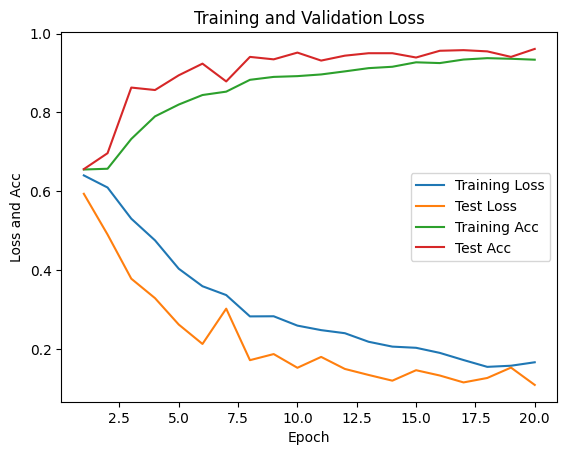

In [ ]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(test_loss) + 1), test_loss, label='Test Loss')

plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Acc')
plt.plot(range(1, len(test_acc) + 1), test_acc, label='Test Acc')

plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss and Acc')
plt.legend()

In [ ]:
X = []
y = []

for i in range(len(validation_generator)):
    X_batch, y_batch = validation_generator.next()

    X.append(X_batch)
    y.append(y_batch)

X = np.concatenate(X)
y = np.concatenate(y)

In [ ]:
y_pred = model.predict(X)
y_pred_classes = (y_pred > 0.5).astype(int)

conf_matrix = confusion_matrix(y, y_pred_classes)

21/21 [==============================] - 1s 25ms/step


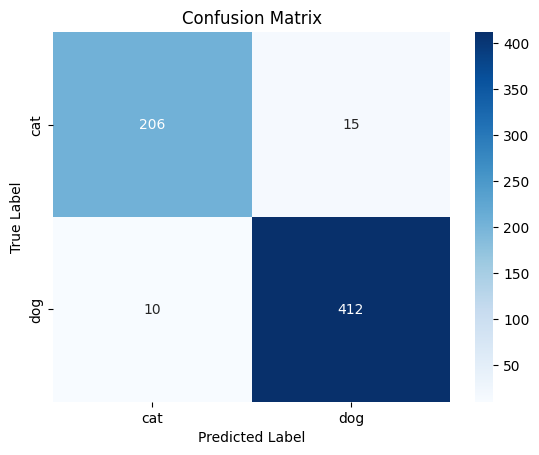

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Модель для многоклассовой классификации

In [ ]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_breed,
    x_col='Path',
    y_col='Label',
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical',
    seed=42
)

validation_generator = test_datagen.flow_from_dataframe(
    dataframe=test_breed,
    x_col='Path',
    y_col='Label',
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical',
    seed=42
)

(len(train_generator), len(validation_generator))

Found 2568 validated image filenames belonging to 35 classes.
Found 643 validated image filenames belonging to 35 classes.


(81, 21)

In [ ]:
num_classes = breed_df['Label'].value_counts().count()

model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

In [ ]:
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history2 = model2.fit(train_generator, epochs=20, validation_data=(validation_generator))

Epoch 1/20
81/81 [==============================] - 35s 396ms/step - loss: 3.5418 - accuracy: 0.0502 - val_loss: 3.5153 - val_accuracy: 0.0591
Epoch 2/20
81/81 [==============================] - 32s 392ms/step - loss: 3.4425 - accuracy: 0.0619 - val_loss: 3.3187 - val_accuracy: 0.0544
Epoch 3/20
81/81 [==============================] - 33s 409ms/step - loss: 3.3257 - accuracy: 0.0752 - val_loss: 3.2178 - val_accuracy: 0.0793
Epoch 4/20
81/81 [==============================] - 33s 412ms/step - loss: 3.2186 - accuracy: 0.0946 - val_loss: 2.9975 - val_accuracy: 0.1337
Epoch 5/20
81/81 [==============================] - 32s 399ms/step - loss: 3.0806 - accuracy: 0.1293 - val_loss: 2.9311 - val_accuracy: 0.1866
Epoch 6/20
81/81 [==============================] - 34s 423ms/step - loss: 3.0066 - accuracy: 0.1488 - val_loss: 2.8060 - val_accuracy: 0.1944
Epoch 7/20
81/81 [==============================] - 33s 404ms/step - loss: 2.9131 - accuracy: 0.1581 - val_loss: 2.5789 - val_accuracy: 0.2457

# Оценка для пород

In [ ]:
X = []
y = []

for i in range(len(validation_generator)):
    X_batch, y_batch = validation_generator.next()

    X.append(X_batch)
    y.append(y_batch)

X_test = np.concatenate(X)
y_test = np.concatenate(y)

In [ ]:
loss, accuracy = model2.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

21/21 [==============================] - 1s 24ms/step - loss: 1.5888 - accuracy: 0.5117
Test Loss: 1.5887993574142456
Test Accuracy: 0.511664092540741


In [ ]:
y_pred_probabilities = model2.predict(X_test)
y_true_indices = np.argmax(y_test, axis=1)

top3_accuracy = top_k_accuracy_score(y_true_indices, y_pred_probabilities, k=3)

print(f'Top-3 Accuracy: {top3_accuracy}')

21/21 [==============================] - 1s 25ms/step
Top-3 Accuracy: 0.7713841368584758


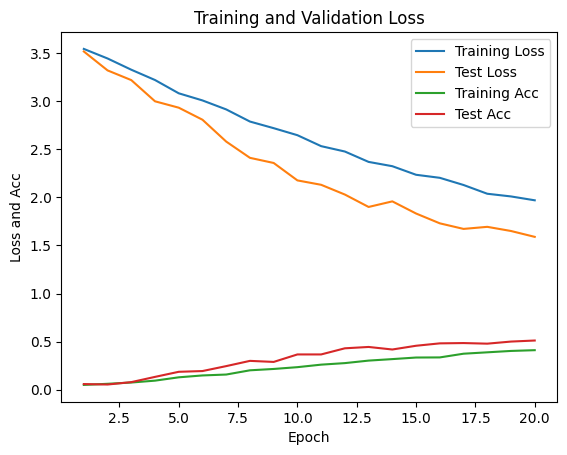

In [ ]:
train_loss = history2.history['loss']
test_loss = history2.history['val_loss']
train_acc = history2.history['accuracy']
test_acc = history2.history['val_accuracy']

plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(test_loss) + 1), test_loss, label='Test Loss')

plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Acc')
plt.plot(range(1, len(test_acc) + 1), test_acc, label='Test Acc')

plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss and Acc')
plt.legend()

In [ ]:
y_pred = model2.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred_classes)

21/21 [==============================] - 1s 24ms/step


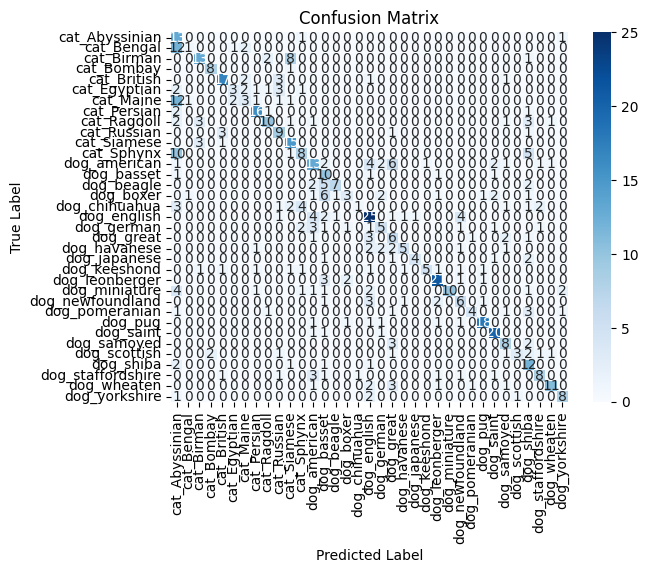

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()